# ТЕМА 4. Работа с датасетом Security Patches Dataset
Подготовил студент группы ББМО-01-23 Чурсинов Герман

### Требуется
1. Выбрать датасет, предобработать и описать датасет, визуализировать его
2. Выбрать признаковое пространство
3. Выбрать модель машинного обучения, дающую наулучшую оценку точности по F1-мере, подготовить отчет по результатам и загрузить на гитлаб

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [90]:
url = 'https://raw.githubusercontent.com/TQRG/security-patches-dataset/main/data/cve-details/all-cve-details-patches.csv'
data = pd.read_csv(url, quotechar='"', on_bad_lines='skip')
data = data.drop(columns=['cve_id', 'publish_date', 'update_date', 'cve_href','acces_level', 'summary', 'refs', 'code_refs', 'authentication'])
data = data.dropna(subset=['cwe_id', 'score', 'access', 'complexity', 'confidentiality', 'integrity', 'availability'])
data.head()

,cwe_id,vuln_type,score,access,complexity,confidentiality,integrity,availability
0,CWE-94,Exec Code,10.0,Remote,Low,Complete,Complete,Complete
2,CWE-89,Sql,7.5,Remote,Low,Partial,Partial,Partial
3,CWE-89,Sql,7.5,Remote,Low,Partial,Partial,Partial
4,CWE-89,Sql,7.5,Remote,Low,Partial,Partial,Partial
12,CWE-190,Overflow,4.6,Local,Low,Partial,Partial,Partial


In [91]:
for column in data.columns:
  print(f'{column}\n{data[column].describe()}\n')

cwe_id
count        2913
unique        129
top       CWE-119
freq          373
Name: cwe_id, dtype: object

vuln_type
count          2028
unique           64
top       Exec Code
freq            381
Name: vuln_type, dtype: object

score
count    2913.000000
mean        6.972331
std         1.187702
min         0.000000
25%         6.800000
50%         7.200000
75%         7.500000
max        10.000000
Name: score, dtype: float64

access
count       2913
unique         4
top       Remote
freq        2229
Name: access, dtype: object

complexity
count     2913
unique       4
top        Low
freq      1872
Name: complexity, dtype: object

confidentiality
count        2913
unique          3
top       Partial
freq         2327
Name: confidentiality, dtype: object

integrity
count        2913
unique          3
top       Partial
freq         2327
Name: integrity, dtype: object

availability
count        2913
unique          3
top       Partial
freq         2312
Name: availability, dtype: object


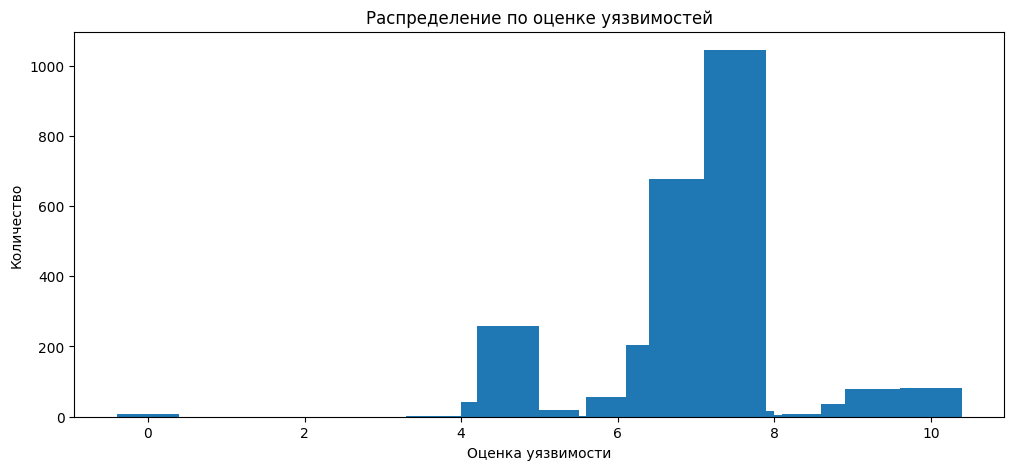

In [92]:
plt.figure(figsize=(12, 5))
score_counts = data['score'].value_counts()
plt.bar(score_counts.index, score_counts.values)
plt.xlabel('Оценка уязвимости')
plt.ylabel('Количество')
plt.title('Распределение по оценке уязвимостей')
plt.show()

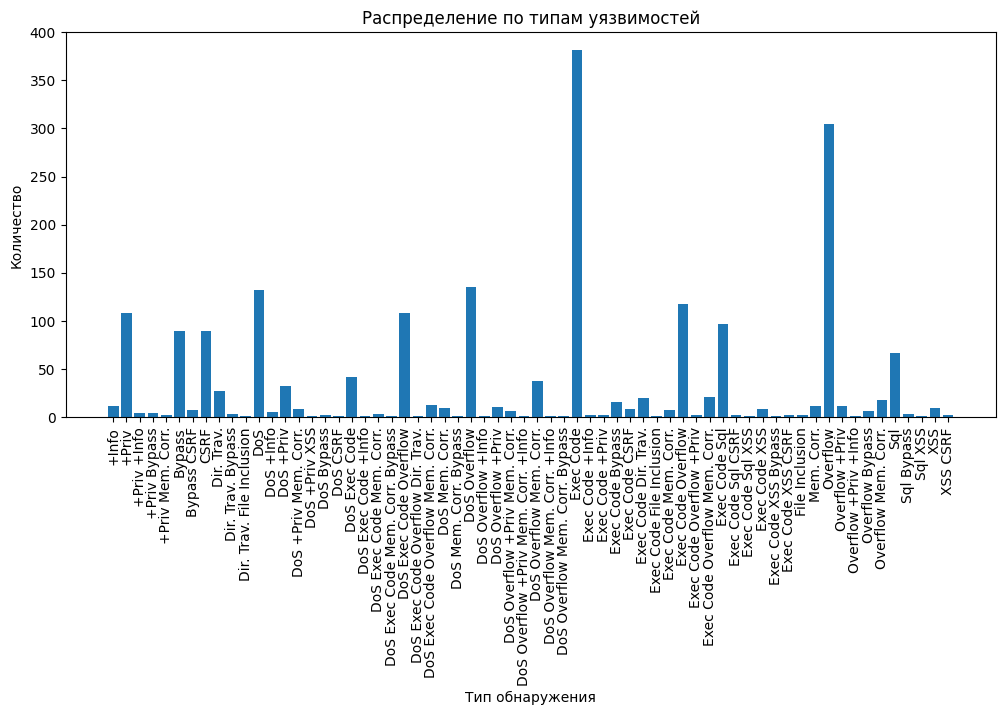

In [93]:
plt.figure(figsize=(12, 5))
year_counts = data['vuln_type'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Тип обнаружения')
plt.xticks(rotation=90)
plt.ylabel('Количество')
plt.title('Распределение по типам уязвимостей')
plt.show()

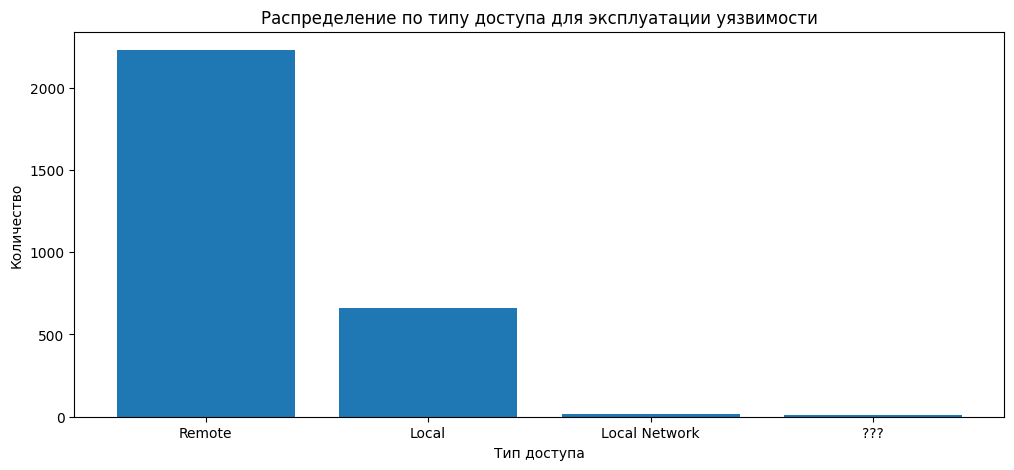

In [94]:
plt.figure(figsize=(12, 5))
severity_counts = data['access'].value_counts()
plt.bar(severity_counts.index, severity_counts.values)
plt.xlabel('Тип доступа')
plt.ylabel('Количество')
plt.title('Распределение по типу доступа для эксплуатации уязвимости')
plt.show()

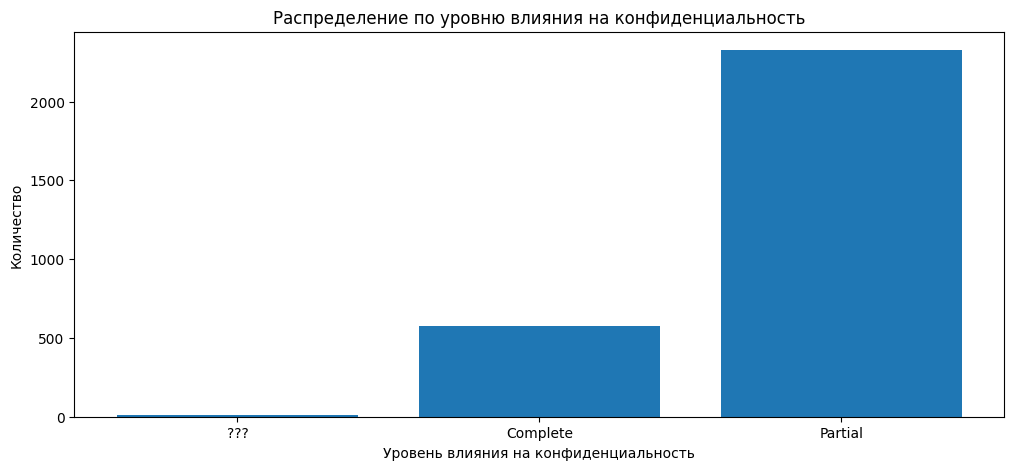

In [95]:
plt.figure(figsize=(12, 5))
year_counts = data['confidentiality'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Уровень влияния на конфиденциальность')
plt.ylabel('Количество')
plt.title('Распределение по уровню влияния на конфиденциальность')
plt.show()

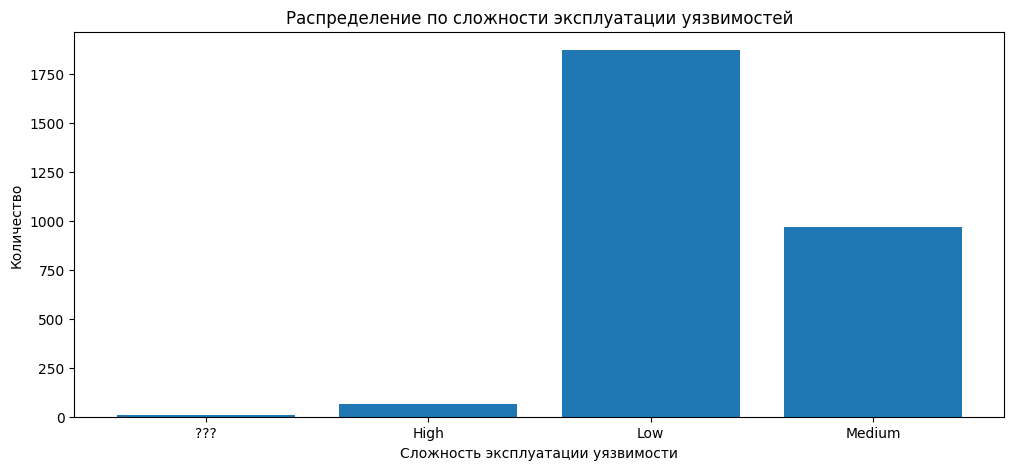

In [96]:
plt.figure(figsize=(12, 5))
year_counts = data['complexity'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Сложность эксплуатации уязвимости')
plt.ylabel('Количество')
plt.title('Распределение по сложности эксплуатации уязвимостей')
plt.show()

In [97]:
data['access'] = data['access'].replace({"Remote": 0, "Local": 1, "Local Network": 2, "???": 3})
data['confidentiality'] = data['confidentiality'].replace({"Partial": 0, "Complete": 1, "???": 2})
data['integrity'] = data['integrity'].replace({"Partial": 0, "Complete": 1, "???": 2})
data['availability'] = data['availability'].replace({"Partial": 0, "Complete": 1, "???": 2})

In [98]:
X = data[['score', 'access', 'confidentiality', 'integrity', 'availability']]
y = data['complexity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = [
    ('Логистическая регрессия', LogisticRegression(random_state=42)),
    ('Метод опорных векторов', SVC(random_state=42)),
    ('Случайный лес', RandomForestClassifier(random_state=42)),
    ('Метод К-ближайших соседей', KNeighborsClassifier()),
    ('Наивный Байес', GaussianNB()),
    ('Дерево решений', DecisionTreeClassifier(random_state=42))]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}: F-мера = {f1_score(y_test, y_pred, average='weighted')}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: F1-score = 0.8543411895804375
Support Vector Machine: F1-score = 0.8256444545082977
Random Forest: F1-score = 0.9976953193021125
K Nearest Neighbors: F1-score = 0.9953563047654264
Gaussian Naive Bayes: F1-score = 0.4828379732853315
Decision Tree: F1-score = 0.9976953193021125
